# Modelado Predictivo de Precios – Airbnb NYC

Se busca poner a prueba distintos modelos con estos datos y comparar sus rendimientos usando métricas como MAE, RMSE, R CUADRADO, se espera una mejora conforme más robusto o potente sea el modelo probado. 

## 1. Craga de DataSet limpio

Corresponde al DataSet de la fase 1. Contiene: 
- Variables numéricas escaladas y transformadas
- Outliers tratados
- Variables categóricas con One-Hot Encoding
- Barrios poco frecuentes agrupados en "Other"

In [1]:
#IMPORTAT LIBRER+IAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 

In [2]:
df=pd.read_csv("airbnb_clean_ohe.csv")
df.head()

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_log,room_type_Private room,room_type_Shared room,...,neighbourhood_simplified_Sunset Park,neighbourhood_simplified_Theater District,neighbourhood_simplified_Tribeca,neighbourhood_simplified_Upper East Side,neighbourhood_simplified_Upper West Side,neighbourhood_simplified_Washington Heights,neighbourhood_simplified_West Village,neighbourhood_simplified_Williamsburg,neighbourhood_simplified_Windsor Terrace,neighbourhood_simplified_Woodside
0,40.64749,-73.97237,149,1,0.21,6,365,2.302585,True,False,...,False,False,False,False,False,False,False,False,False,False
1,40.75362,-73.98377,225,1,0.38,2,355,3.828641,False,False,...,False,False,False,False,False,False,False,False,False,False
2,40.80902,-73.94190,150,3,0.00,1,365,0.000000,True,False,...,False,False,False,False,False,False,False,False,False,False
3,40.68514,-73.95976,89,1,4.64,1,194,5.602119,False,False,...,False,False,False,False,False,False,False,False,False,False
4,40.79851,-73.94399,80,10,0.10,1,0,2.302585,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2. Prepración de datos

- Separación de variables
- Modelo base preliminar 
- Eliminación de variables no significativas para el modelo

In [3]:
#Modelo de diagnostico 
X=df.drop("price", axis=1)
y=df['price']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Entrenar el Random Forest inicial 
from sklearn.ensemble import RandomForestRegressor

In [7]:
model=RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [8]:
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
#Medir el desempeño 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
#predicciones en el conjunto de datos test 
y_pred=model.predict(X_test)

In [11]:
#metricas
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test, y_pred)
mae, rmse, r2

(51.06192322116532, np.float64(90.49604466807035), 0.4505424285364744)

In [12]:
df["price"].describe()

count    48881.000000
mean       143.967758
std        121.994440
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        800.000000
Name: price, dtype: float64

In [13]:
importances = model.feature_importances_

fi = pd.DataFrame({
    "feature": X.columns,
    "importance": importances 
}).sort_values(by="importance", ascending=False)

fi.head(20)

,feature,importance
1,longitude,0.197394
7,room_type_Private room,0.190912
0,latitude,0.163994
5,availability_365,0.107444
2,minimum_nights,0.067069
3,reviews_per_month,0.066655
6,number_of_reviews_log,0.054845
4,calculated_host_listings_count,0.048016
8,room_type_Shared room,0.021275
53,neighbourhood_simplified_Midtown,0.017602


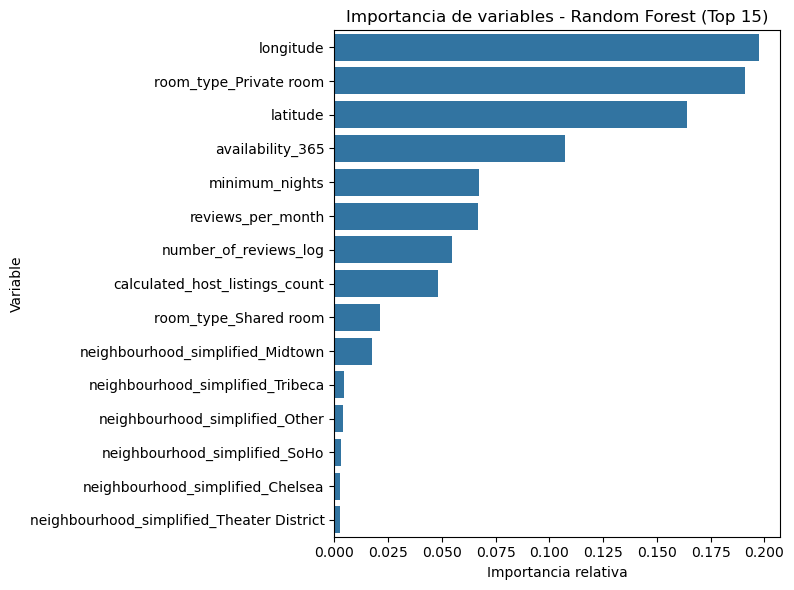

In [14]:
plt.figure(figsize=(8,6))
sn.barplot(
    data=fi.head(15),
    x="importance",
    y="feature"
)
plt.title("Importancia de variables - Random Forest (Top 15)")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [15]:
#SE DECIDE ELIMINAR TODAS LAS VARIABLES TIPO DUMMIE DE NIEHBOUORHOOD 
# Identificar todas las columnas que comienzan con 'neighbourhood'
cols_barrios = [c for c in df.columns if c.startswith("neighbourhood")]

# Eliminarlas
df_clean = df.drop(columns=cols_barrios)

df_clean.shape


(48881, 10)

In [16]:
df_clean.columns.to_list()

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_log',
 'room_type_Private room',
 'room_type_Shared room']

## 3. Modelos de Machine Learning 

1. **Regresión Lineal**
2. **Random Forest Regressor**
3. **Gradient Boosting Regressor**
4. **XGBoost Regressor**

Cada modelo se evalúa usando:
- MAE
- RMSE
- R²

### Regresión lineal 

Referencia del desempeño 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# 1. Crear el modelo
lin_model = LinearRegression()

# 2. Entrenarlo
lin_model.fit(X_train, y_train)

# 3. Predecir sobre el test
y_pred = lin_model.predict(X_test)

In [19]:
# 4. Calcular métricas
mae_lin = mean_absolute_error(y_test, y_pred)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lin = r2_score(y_test, y_pred)

mae_lin, rmse_lin, r2_lin

(57.32243428292808, np.float64(98.26673540767106), 0.3521297716604267)

In [20]:
df_clean.to_csv("airbnb_model_ready_v1.csv", index=False)

### Random Forest

Modelo basado en múltiples árboles de decisión.
Captura relaciones no lineales.

In [21]:
#ENTRENAR RANDOM FOREST 
#VOY A USAR LA FUNCIÓN QUE TENGO ARRIBA CON RANDOM FOREST
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred_rf=model.predict(X_test)

In [23]:
mae_rf=mean_absolute_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf=r2_score(y_test,y_pred_rf)
mae_rf, rmse_rf, r2_rf

(51.06192322116532, np.float64(90.49604466807035), 0.4505424285364744)

### Gradient Boosting

Modelo secuencial donde cada árbol corrige errores del anterior.
Muy potente para datos no lineales.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
# Crear modelo
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

In [26]:
# Entrenar
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [27]:
# Predecir
y_pred_gbr = gbr.predict(X_test)

In [28]:
# Métricas
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

mae_gbr, rmse_gbr, r2_gbr

(52.57554363089718, np.float64(92.52065401751334), 0.42568209666914525)

### XGBoost 

Algoritmo de boosting optimizado con excelente desempeño en problemas de regresión.

In [29]:
!pip install xgboost

In [30]:
from xgboost import XGBRegressor

In [31]:
# Modelo XGBoost base
model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [32]:
# Entrenar
model_xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
# Predicciones
y_pred = model_xgb.predict(X_test)

In [34]:
# Métricas
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

(mae_xgb, rmse_xgb, r2_xgb)

(49.93611526489258, np.float64(88.55697539225807), 0.4738367795944214)

## Features Engineering

A simple vista el modelo no mejora. 
Se encontró en otros análisis similares que la distancia con zonas relevantes suele ser una buena variable. 

In [35]:
#como el modelo no mejora, se va a usar la longitud y la latitud para calcular la distancia a Time Square y verificar si influye en el modelo
# Coordenadas de Times Square (centro de referencia)
ts_lat = 40.7580
ts_lon = -73.9855

# Función Haversine
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la tierra en km
    
    # Convertir a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

In [36]:
# Crear la nueva variable de distancia
df_clean["distance_to_times_sq"] = haversine_distance(
    df_clean["latitude"],
    df_clean["longitude"],
    ts_lat,
    ts_lon
)

df_clean["distance_to_times_sq"].head()

0    12.337898
1     0.508366
2     6.757240
3     8.387034
4     5.701496
Name: distance_to_times_sq, dtype: float64

### Reentrenamiento de XGBoost

In [37]:
features = [
    "latitude",
    "longitude",
    "minimum_nights",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "number_of_reviews_log",
    "room_type_Private room",
    "room_type_Shared room",
    "distance_to_times_sq"
]

In [38]:
X = df_clean[features]
y = df_clean["price"]

In [39]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

mae_xgb2 = mean_absolute_error(y_test, y_pred)
rmse_xgb2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb2 = r2_score(y_test, y_pred)

mae_xgb2, rmse_xgb2, r2_xgb2

(49.94127655029297, np.float64(88.5917217580881), 0.4734237790107727)

In [42]:
#COMPARATIVA DE MODELOS
resultados_modelos = pd.DataFrame({
    "Modelo": [
        "Regresión Lineal",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost (baseline)",
        "XGBoost + Distancia TS"
    ],
    "MAE": [mae_lin, mae_rf, mae_gbr, mae_xgb, mae_xgb2],
    "RMSE": [rmse_lin, rmse_rf, rmse_gbr, rmse_xgb, rmse_xgb2],
    "R²": [r2_lin, r2_rf, r2_gbr, r2_xgb, r2_xgb2]
})

resultados_modelos.sort_values("RMSE")


,Modelo,MAE,RMSE,R²
3,XGBoost (baseline),49.936115,88.556975,0.473837
4,XGBoost + Distancia TS,49.941277,88.591722,0.473424
1,Random Forest,51.061923,90.496045,0.450542
2,Gradient Boosting,52.575544,92.520654,0.425682
0,Regresión Lineal,57.322434,98.266735,0.352130


In [44]:
df_clean.head()

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_log,room_type_Private room,room_type_Shared room,distance_to_times_sq
0,40.64749,-73.97237,149,1,0.21,6,365,2.302585,True,False,12.337898
1,40.75362,-73.98377,225,1,0.38,2,355,3.828641,False,False,0.508366
2,40.80902,-73.94190,150,3,0.00,1,365,0.000000,True,False,6.757240
3,40.68514,-73.95976,89,1,4.64,1,194,5.602119,False,False,8.387034
4,40.79851,-73.94399,80,10,0.10,1,0,2.302585,False,False,5.701496


### Conclusiones 

- La regresión lineal sirve únicamente como modelo base
- Los modelo basados en árboles mejoran considerablemente el modelo
- XGBoost es el mejor modelo, como se esperaba, debido a que es capaz de capturar patrones de mayor complejidad.
- Aumentar la variable de distancia no mejora el modelo, puede deberse a la redundancia de la infoamción que captura la nueva variable, con la que ya existe en las variables de barrios o las variables espaciales.  